In [1]:
import copy
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
import numpy
import random

In [50]:
def func_rand(G, v, he, n, color, C_l):
    ans = 0
    tot_mas = 0.0
    mapp = [0] * (n + 1)
    for to in he:
        mas_of_child = G[v][to]
        col_of_child = C_l[to]
        #print(col_of_child, end = ' ')
        mapp[col_of_child] += mas_of_child
    vec = []
    for i in range(n + 1):
        if mapp[i] != 0:
            tot_mas += mapp[i]
        vec.append(i)
    #print(tot_mas)
    for i in range(n + 1):
        if mapp[i] != 0:
            mapp[i] /= tot_mas
    if tot_mas == 0:
        return color
    qwe = numpy.random.choice(vec, 1, p = mapp)
    ans = qwe[0]
    return ans

In [51]:
def func_math(G, v, he, n, color, C_l):
    ans = 0
    mx = -1
    mapp = [0] * (n + 1)
    for to in he:
        mas_of_child = G[v][to]
        col_of_child = C_l[to]
        mapp[col_of_child] += mas_of_child
    for i in range(1, n + 1):
        if mx < mapp[i]:
            mx = mapp[i]
    vec = []
    for i in range(1, n + 1):
        if mapp[i] == mx:
            vec.append(i)
    for i in vec:
        if color == i:
            ans = i
            break
    if ans != 0:
        return ans
    numpy.random.shuffle(vec)
    ans = vec[0]
    return ans

In [56]:
def label_propagation(G, st_ver, n, h_G):
    rand_ver = [0] * n
    for i in range(n):
        rand_ver[i] = i
    update = True
    C = copy.deepcopy(st_ver)
    while update:
        update = False
        numpy.random.shuffle(rand_ver)
        for u in rand_ver:
            get_color = func_math(G, u, h_G[u], n, C[u], C)
            if get_color != C[u]:
                update = True
                C[u] = get_color
            
    return C

In [125]:
def label_propagation_rand(G, st_ver, n, h_G):
    rand_ver = [0] * n
    for i in range(n):
        rand_ver[i] = i
    update = 100
    C = copy.deepcopy(st_ver)
    while update > 60:
        update = 0
        numpy.random.shuffle(rand_ver)
        for u in rand_ver:
            get_color = func_rand(G, u, h_G[u], n, C[u], C)
            if get_color != C[u]:
                update += 1
                C[u] = get_color
            
    return C

In [150]:
#n = int(input())
n = 1000
D = nx.planted_partition_graph(50, 20, 0.005, 0.001)
A = nx.adjacency_matrix(D)
#print(A.todense())
G = A
G = G.toarray()
for i in range(n):
    for j in range(n):
        if G[i][j] != 0:
            G[i][j] = random.randint(0, 1000)
        #print(G[i][j], end = ' ')
    #print()

#for i in range(n):
#    G.append([int(j) for j in input().split()])
#start_label = list(map(int, input().split()))
start_label = [0] * n

In [151]:
mapp = [0] * (n + 1)
for i in start_label:
    mapp[i] += 1
id_i = 0
for i in range(1, n + 1):
    if mapp[i] == 0:
        id_i = i
        break
for i in range(n):
    if start_label[i] == 0:
        start_label[i] = id_i
        id_i += 1
        if id_i == n + 1:
            break
        while id_i != n + 1 and mapp[id_i] != 0:
            id_i += 1
help_G = []
for i in range(n):
    help_G.append([])
for i in range(n):
    for j in range(len(G[i])):
        if G[i][j] != 0:
            help_G[i].append(j)

1 972 159 885 5 864 7 8 814 967 11 977 13 14 15 16 736 18 553 511 21 22 23 24 230 945 27 729 231 30 858 32 845 201 35 881 680 38 39 159 385 128 270 44 45 591 618 48 49 862 988 1 53 54 55 56 16 58 885 599 61 62 728 729 65 387 67 24 996 70 71 72 192 74 263 889 77 589 975 80 15 82 83 511 85 86 87 88 89 90 160 159 159 94 95 96 27 888 286 100 101 102 504 392 105 106 107 551 109 235 111 772 106 448 297 231 864 132 448 83 121 367 123 739 125 126 127 128 769 55 472 132 270 140 439 917 230 504 121 140 570 142 143 144 160 402 282 148 882 150 975 152 11 154 155 1 820 786 159 160 589 512 163 865 170 192 367 168 554 170 786 172 173 174 451 125 177 882 953 854 181 182 183 32 185 53 219 188 189 764 191 729 260 377 195 196 535 198 199 200 201 202 199 916 679 260 16 208 311 210 211 806 951 159 215 311 699 218 219 220 221 880 448 791 783 230 44 16 229 230 231 74 791 234 235 236 237 238 201 901 241 242 160 744 599 246 247 248 249 250 251 723 408 797 624 256 257 258 259 260 515 262 263 264 961 266 267 268

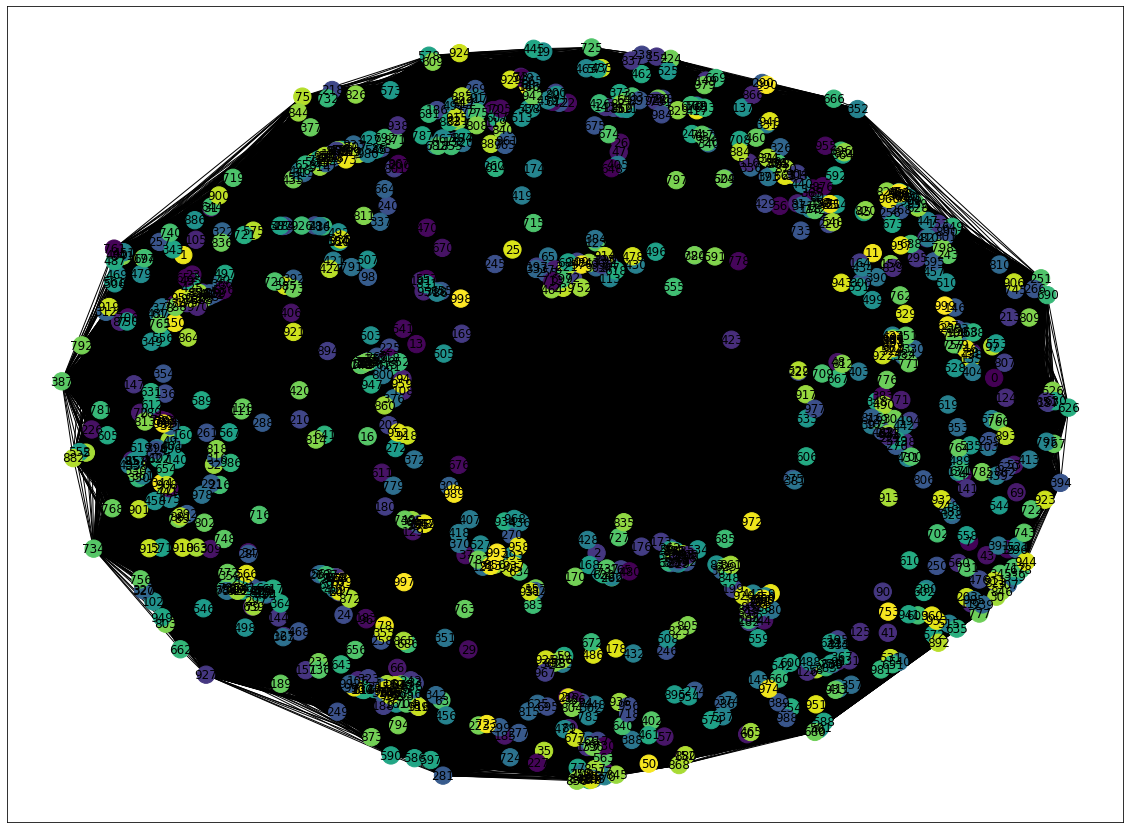

In [152]:
get_ans = label_propagation(G, start_label, n, help_G)
for i in range(n):
    print(get_ans[i], end = ' ')

look = nx.Graph()
for i in range(n):
    look.add_node(i)
for i in range(n):
    for j in range(n):
        look.add_edge(i, j, length=G[i][j])
plt.figure(figsize=(20,15))
pos = nx.spring_layout(look)
#nx.draw_networkx_edge_labels(look, pos)
nx.draw_networkx(look, pos, node_color = get_ans)
plt.show()

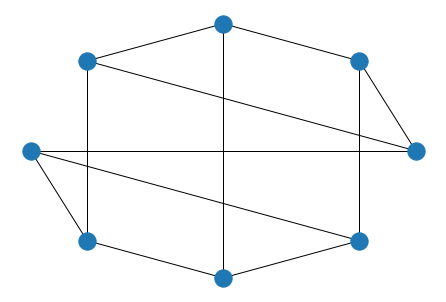

In [87]:
G = nx.complete_graph(20)
A = nx.adjacency_matrix(G)
#print(A.todense())
G=nx.cubical_graph()
nx.draw_circular(G)   # тип по умолчанию spring_layout